# Linear Regression Exercise

This exercise will guide you in implementing the Linear Regression Model to gain intuitions and develop a deeper understanding of the model. These concepts will form as the foundation for more complex models later on.

**You will learn to:**
- Build the general architecture of a Linear Regression Model.
    - Implement the Analytical solution for the parameters that minimizes the loss function
    - Implement the Approximate / Iterative solution for finding the parameters that minimizes the Loss function 
        - Initializing Parameters
        - Calculating the Cost/Loss/Objective Function
        - Computing for the gradients of the Loss function with respect to the parameters
        - Implement gradient descent to update the paramters

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import math

plt.style.use('ggplot')

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

**Dataset:**
We will use the sales prices of houses in Kansas City as our dataset. We will only get one feature / variable (living area) to be able to visualize the dataset in a 2D plane. For the purposes of this exercise, we will only visualize the best fitting regression line / curve so we do not need to generate train/test splits.

In [2]:
with open('house.csv', 'r') as csvfile:
    rawData = csv.reader(csvfile)
    next(csvfile)
    X = np.empty((0,1), int)
    y = np.empty((0,1), int)
    for row in rawData:
        X = np.vstack([X, np.array([int(row[3])])])
        y = np.append(y, np.array([int(row[7])]))
        
y = np.expand_dims(y,1)

print('Training data shape:',X.shape)
print('Ground truth values shape:',y.shape)

Training data shape: (128, 1)
Ground truth values shape: (128, 1)


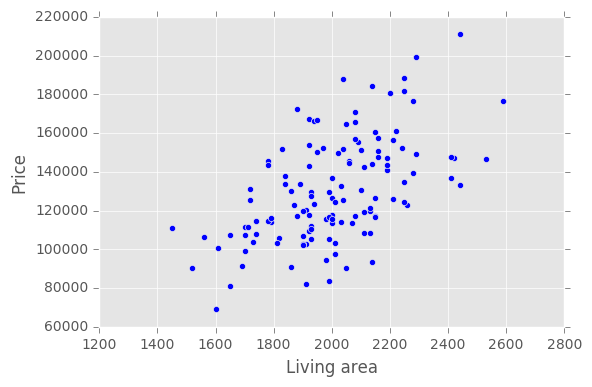

In [3]:
# plot the dataset
plt.scatter(X,y)
plt.ylabel("Price")
plt.xlabel("Living area")

From the plot above, we can clearly see the (positive) linear relationship between the living area of the house and its price.

**Open `linear_regression.py`. **

**(1.)** Fill in the code for the function `feature_transform`. This just appends a vector of ones to the dimension of your feature vector to accomodate for the bias / constant term in our hypothesis function.

**(2.)** Under the `train` function, you will find an if statement checking if the parameter analytic_solution is set to True. Implement the analytic_solution solution without regularization.

**(3.)** Fill in the code for the `predict` function.

In [4]:
from linear_regression import LinearRegression

In [5]:
regressor = LinearRegression()
regressor.train(X,y,analytic_solution=True)

print("Weights =", regressor.params["W"])

Weights = [[    70.22631824]
 [-10091.12990912]]


**Sanity Check :** The resulting weight vector should be approximately equal to:

Weights = [[    70.22631824]
 [-10091.12990913]]

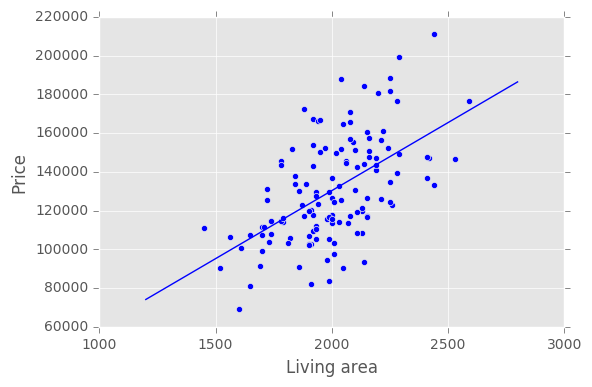

In [6]:
# plot fitted regression line 
X_range = np.expand_dims(np.arange(1200,2800,1),1)
y_range = regressor.predict(X_range)
plt.scatter(X,y)
plt.plot(X_range,y_range,"b")
plt.ylabel("Price")
plt.xlabel("Living area")

Next is to implement the iterative solution to linear regression using gradient descent. 

**(4.)** Implement the function `initialize_weights`.

**(5.)** Implement the function `loss`.

**(6.)** Fill in the missing codes for the function `train`.

In [7]:
regressor = LinearRegression()
losses = regressor.train(X,y,learning_rate=1e-8, num_iters=200, batch_size=128, verbose=False)

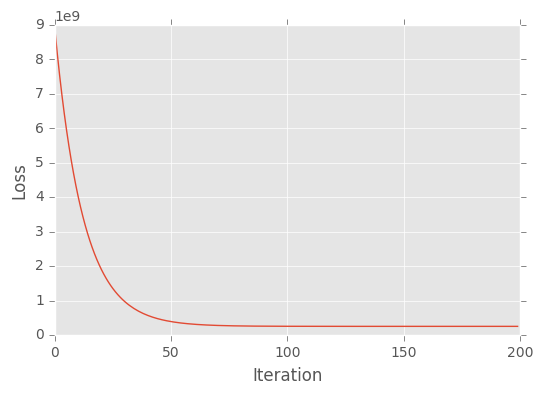

In [8]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [9]:
print("Weights =",regressor.params["W"])

Weights = [[  6.52216443e+01]
 [  2.58909141e-02]]


**Sanity Check :** The loss curve should be decreasing exponentially.

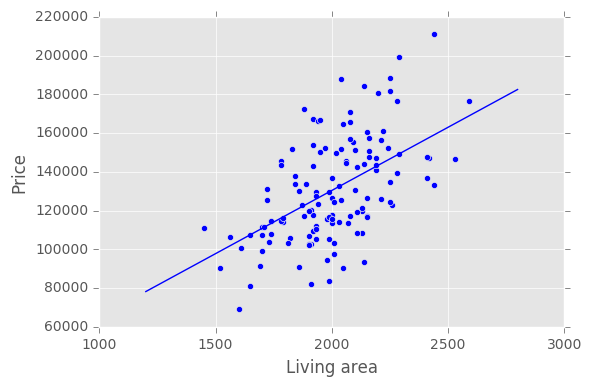

In [10]:
# plot fitted line 
X_range = np.expand_dims(np.arange(1200,2800,1),1)
y_range = regressor.predict(X_range)
plt.scatter(X,y)
plt.plot(X_range,y_range,"b")
plt.ylabel("Price")
plt.xlabel("Living area")

Try increasing the learning rate to 1e-6. What happened and why?

In [11]:
regressor = LinearRegression()
losses = regressor.train(X,y,learning_rate=1e-6, num_iters=200, batch_size=128, verbose=False)

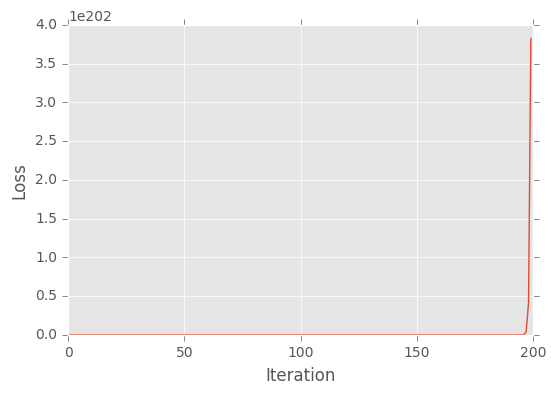

In [12]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

Increasing the learning rate decreases the number of steps needed to take to reach global minimum. However, in this case, setting the learning rate from 1e-8 to 1e-6 skipped the optimal solution